# Data Processing and Versioning

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [60]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn
from azureml.core import Workspace, Dataset

In [61]:
# import dataset

df = pd.read_csv('Dataset/weather_dataset_raw.csv')

# 1. Data quality assessment 

In [73]:
df.head(100)

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,rain
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,rain
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,rain
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,rain
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,rain
...,...,...,...,...,...,...,...,...,...,...,...
95,95,2006-04-12 23:00:00+02:00,"Port of Turku, Finland",7.855556,6.122222,0.72,9.8049,11,15.0052,1006.56,rain
96,96,2006-04-13 00:00:00+02:00,"Port of Turku, Finland",7.316667,6.211111,0.75,6.6654,326,15.8746,1007.07,rain
97,97,2006-04-13 01:00:00+02:00,"Port of Turku, Finland",7.244444,6.005556,0.75,7.1162,309,15.8746,1007.37,rain
98,98,2006-04-13 02:00:00+02:00,"Port of Turku, Finland",5.438889,5.438889,0.88,3.7191,193,9.9820,1012.23,rain


In [63]:
df.describe()

,S_No,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,48226.000000,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,27843.727094,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24113.000000,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,48226.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,72339.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,96452.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [64]:
df.shape

(96453, 11)

In [65]:
df.dtypes

S_No                        int64
Timestamp                  object
Location                   object
Temperature_C             float64
Apparent_Temperature_C    float64
Humidity                  float64
Wind_speed_kmph           float64
Wind_bearing_degrees        int64
Visibility_km             float64
Pressure_millibars        float64
Weather_conditions         object
dtype: object

#### Check for missing data

In [66]:
df.isnull().values.any()

True

# 2. Calibrate missing data

In [67]:
df['Weather_conditions'].fillna(method='ffill',inplace=True,axis=0)

In [68]:
df.isnull().values.any()

False

In [69]:
df.Weather_conditions.value_counts()

Weather_conditions
rain     82271
snow     10712
clear     3470
Name: count, dtype: int64

In [70]:
df["Weather_conditions"].replace({"snow": "no_rain", "clear": "no_rain"}, inplace=True)

In [71]:
df.Weather_conditions.value_counts()

Weather_conditions
rain       82271
no_rain    14182
Name: count, dtype: int64

#### Convert Timestamp to Datetime format

In [78]:
import pandas as pd

# Assuming df is your DataFrame
df['Timestamp'] = pd.to_datetime(df['Timestamp'], utc=True)




In [79]:
df.dtypes


S_No                                    int64
Timestamp                 datetime64[ns, UTC]
Location                               object
Temperature_C                         float64
Apparent_Temperature_C                float64
Humidity                              float64
Wind_speed_kmph                       float64
Wind_bearing_degrees                    int64
Visibility_km                         float64
Pressure_millibars                    float64
Weather_conditions                     object
dtype: object

#### Convert text data to numeric using Label Encoding

In [80]:
y = df['Weather_conditions']

In [81]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [82]:
y = pd.DataFrame(data=y, columns=["Current_weather_condition"])

In [83]:
df = pd.concat([df, y], axis=1)

In [84]:
df.Current_weather_condition.value_counts()

Current_weather_condition
1    82271
0    14182
Name: count, dtype: int64

In [85]:
df.drop(['Weather_conditions'],axis=1,inplace=True)

#### Future Weather_condition

In [86]:
df['Future_weather_condition'] = df.Current_weather_condition.shift(4, axis = 0) 

In [87]:
df.dropna(inplace=True)

In [88]:
df['Future_weather_condition'] = df['Future_weather_condition'].apply(np.int64)

In [89]:
# Result - rain is 0 and no_rain is 1
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Current_weather_condition,Future_weather_condition
4,4,2006-04-01 02:00:00+00:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,1,1
5,5,2006-04-01 03:00:00+00:00,"Port of Turku, Finland",9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66,1,1
6,6,2006-04-01 04:00:00+00:00,"Port of Turku, Finland",7.733333,5.522222,0.95,12.3648,259,9.9820,1016.72,1,1
7,7,2006-04-01 05:00:00+00:00,"Port of Turku, Finland",8.772222,6.527778,0.89,14.1519,260,9.9820,1016.84,1,1
8,8,2006-04-01 06:00:00+00:00,"Port of Turku, Finland",10.822222,10.822222,0.82,11.3183,259,9.9820,1017.37,1,1


In [90]:
df.dtypes

S_No                                       int64
Timestamp                    datetime64[ns, UTC]
Location                                  object
Temperature_C                            float64
Apparent_Temperature_C                   float64
Humidity                                 float64
Wind_speed_kmph                          float64
Wind_bearing_degrees                       int64
Visibility_km                            float64
Pressure_millibars                       float64
Current_weather_condition                  int32
Future_weather_condition                   int64
dtype: object

## b) Understanding Correlations between data (columns)

In [92]:

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Computing correlation matrix
correlation_matrix = numeric_df.corr(method='pearson')


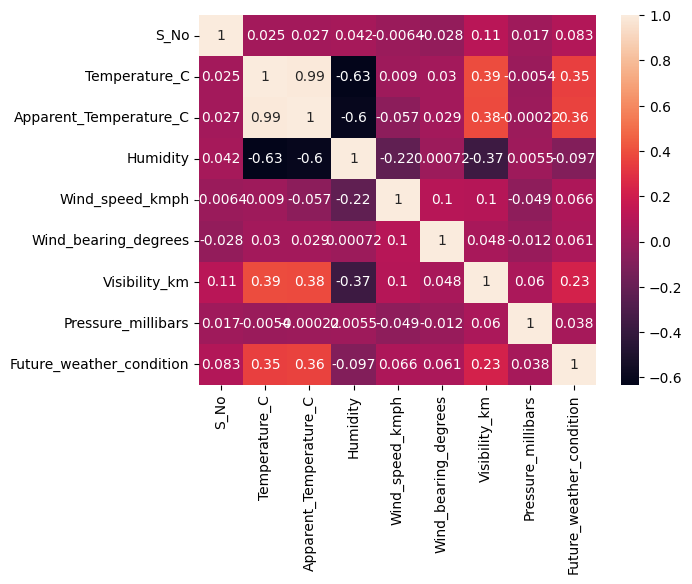

In [98]:
import seaborn as sn
import matplotlib.pyplot as plt

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Computing correlation matrix
corrMatrix = numeric_df.corr()

# Visualizing the correlation matrix using a heatmap
sn.heatmap(corrMatrix, annot=True)
plt.show()


In [99]:
# Filter or drop irrelevent data columns
df.drop(['S_No', 'Apparent_Temperature_C'],axis=1,inplace=True)

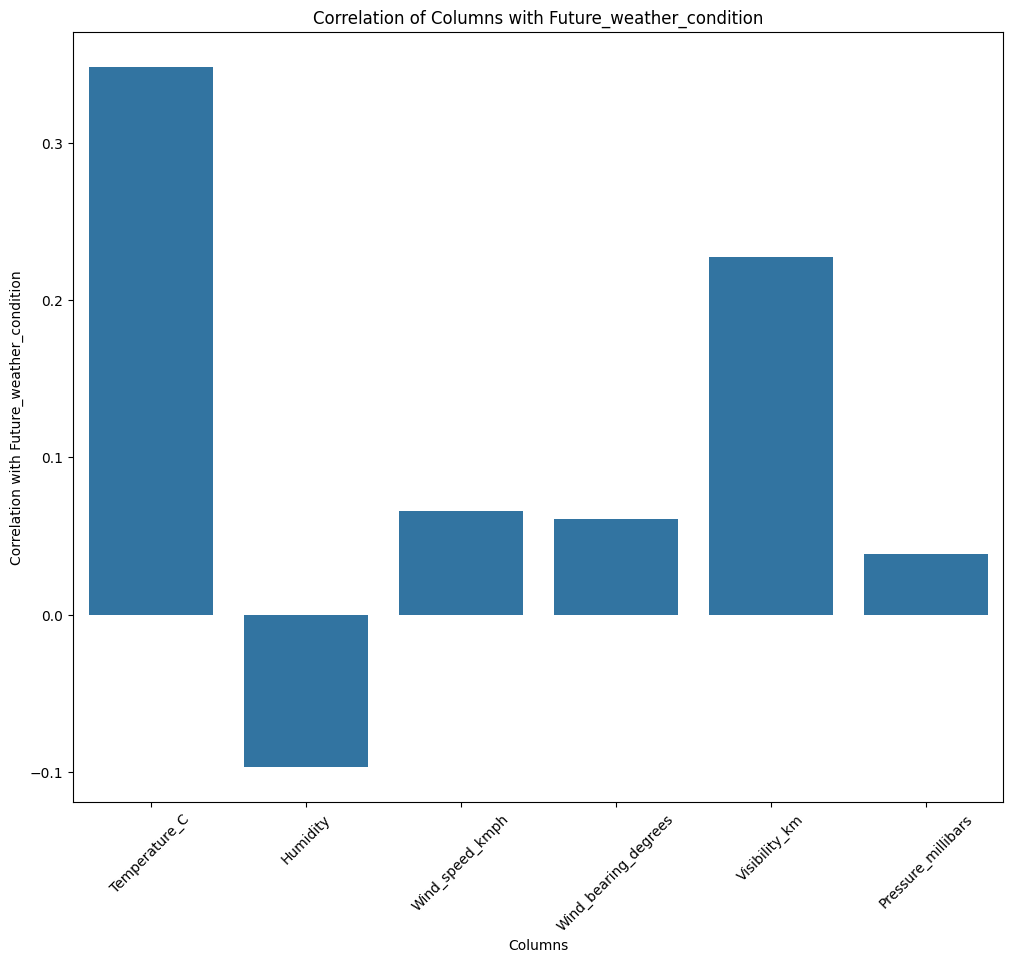

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Computing correlation matrix
corrMatrix = numeric_df.corr()

# Plotting correlation of a specific column with other columns
plt.figure(figsize=(12, 10))
sns.barplot(x=corrMatrix['Future_weather_condition'].drop('Future_weather_condition').index,
            y=corrMatrix['Future_weather_condition'].drop('Future_weather_condition').values)
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Correlation with Future_weather_condition')
plt.title('Correlation of Columns with Future_weather_condition')
plt.show()


## d) Timeseries analysis of Temperature

In [102]:
time = df['Timestamp']
temp = df['Temperature_C']

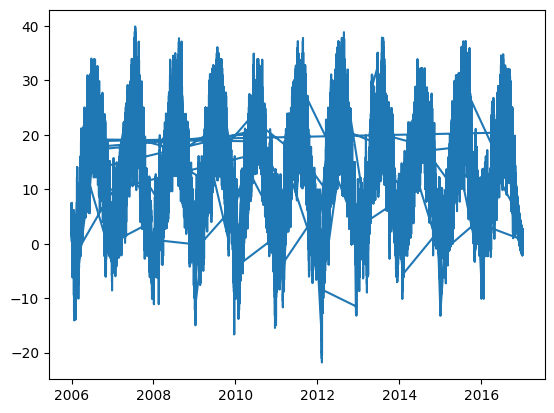

In [103]:
## plot graph
plt.plot(time, temp)
plt.show()

In [104]:
# Save processed dataset 
df.to_csv('Dataset/weather_dataset_processed.csv',index=False)

## Register dataset to the workspace

In [105]:
subscription_id = '7fad185e-3233-4810-aa20-839c96c385d5'
resource_group = 'Learn_MLOps'
workspace_name = 'MLOps_SI'




In [106]:
workspace = Workspace(subscription_id, resource_group, workspace_name)

Performing interactive authentication. Please follow the instructions on the terminal.


The default web browser has been opened at https://login.microsoftonline.com/organizations/oauth2/v2.0/authorize. Please continue the login in the web browser. If no web browser is available or if the web browser fails to open, use device code flow with `az login --use-device-code`.


Interactive authentication successfully completed.


In [107]:
# get the datastore to upload prepared data
datastore = workspace.get_default_datastore()

In [108]:
# upload the local file from src_dir to the target_path in datastore
datastore.upload(src_dir='Dataset', target_path='data')

"Datastore.upload" is deprecated after version 1.0.69. Please use "Dataset.File.upload_directory" to upload your files             from a local directory and create FileDataset in single method call. See Dataset API change notice at https://aka.ms/dataset-deprecation.


Uploading an estimated of 2 files
Uploading Dataset\weather_dataset_raw.csv
Uploaded Dataset\weather_dataset_raw.csv, 1 files out of an estimated total of 2
Uploading Dataset\weather_dataset_processed.csv
Uploaded Dataset\weather_dataset_processed.csv, 2 files out of an estimated total of 2
Uploaded 2 files


$AZUREML_DATAREFERENCE_71c96e2495034accbd664b305a67a6b9

In [109]:
dataset = Dataset.Tabular.from_delimited_files(datastore.path('data/weather_dataset_processed.csv'))

In [110]:
# preview the first 3 rows of the dataset from datastore
dataset.take(3).to_pandas_dataframe()

{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe', 'activityApp': 'TabularDataset'}


,Timestamp,Location,Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Current_weather_condition,Future_weather_condition
0,2006-04-01 02:00:00,"Port of Turku, Finland",8.755556,0.83,11.0446,259,15.8263,1016.51,True,True
1,2006-04-01 03:00:00,"Port of Turku, Finland",9.222222,0.85,13.9587,258,14.9569,1016.66,True,True
2,2006-04-01 04:00:00,"Port of Turku, Finland",7.733333,0.95,12.3648,259,9.9820,1016.72,True,True


In [37]:
# Register Dataset to workspace

In [111]:
weather_ds = dataset.register(workspace=workspace,
                                 name='processed_weather_data_portofTurku',
                                 description='processed weather data')